# Assignment 5: September $16^{th}$, 2025 - Kanak Agarwal

## Randomized Load Balancing Algorithm

The data center consists of $n$ servers and currently has $m$ jobs to be assigned to these servers. Each job is assigned to a server using the following randomized load balancing algorithm:

1. For each job, randomly select two servers.
2. Assign the job to the server with the lesser load.

This is a greedy + randomized algorithm since we are making a greedy choice of assigning the job to the server with the lesser load among the two randomly selected servers.

Maximum server load: 51958.0
Average server load: 50047.69
Standard deviation of server loads: 602.46
Number of servers exceeding threshold (75071.53): 0


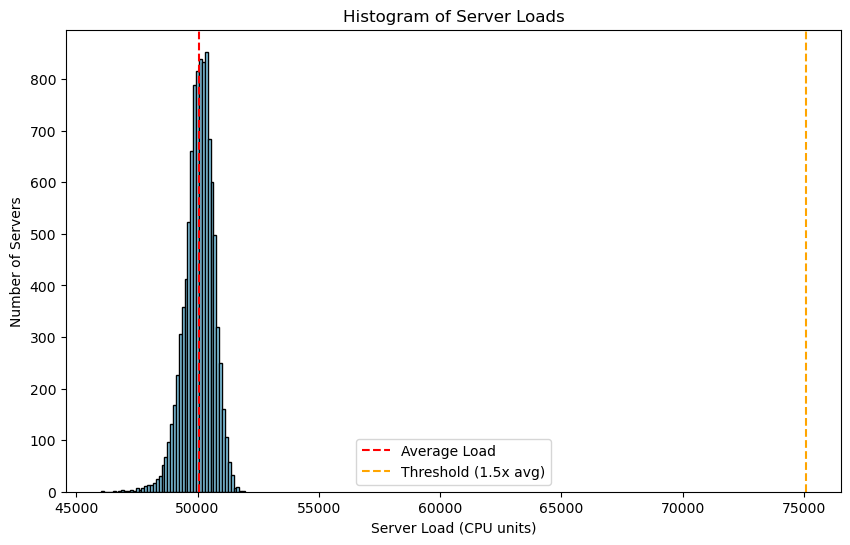

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Input Parameters
n_servers = 10000
m_jobs = 1000000
load_threshold_factor = 1.5

np.random.seed(42) # For reproducibility

task_weights = np.random.randint(1, 1001, size=m_jobs) # Task weights between 1 and 1000
priorities = np.random.choice(['High', 'Medium', 'Low'], size=m_jobs) # Randomly assign priorities

server_loads = np.zeros(n_servers) # Initialize server loads

for i in range(m_jobs):

    task_weight = task_weights[i] # Assign task weight

    s1, s2 = np.random.randint(0, n_servers, size=2) # Randomly select two servers

    # Assign task to the server with lesser load
    if server_loads[s1] <= server_loads[s2]:
        server_loads[s1] += task_weight
    else:
        server_loads[s2] += task_weight

# Compute Performance Metrics
avg_load = np.mean(server_loads)
max_load = np.max(server_loads)
std_load = np.std(server_loads)
threshold = load_threshold_factor * avg_load
overloaded_servers = np.sum(server_loads > threshold)

# Print Performance Metrics
print(f"Maximum server load: {max_load}")
print(f"Average server load: {avg_load:.2f}")
print(f"Standard deviation of server loads: {std_load:.2f}")
print(f"Number of servers exceeding threshold ({threshold:.2f}): {overloaded_servers}")

# Plotting
plt.figure(figsize=(10,6))
plt.hist(server_loads, bins=50, color='skyblue', edgecolor='black')
plt.axvline(avg_load, color='red', linestyle='dashed', linewidth=1.5, label='Average Load')
plt.axvline(threshold, color='orange', linestyle='dashed', linewidth=1.5, label=f'Threshold ({load_threshold_factor}x avg)')
plt.title('Histogram of Server Loads')
plt.xlabel('Server Load (CPU units)')
plt.ylabel('Number of Servers')
plt.legend()
plt.show()

Numpy Arrays are used as they are contigous in memory and hence accessing and updating elements is faster. Additionally, calculating min, max, averages, mean and standard deviation is also faster using numpy arrays.

## Gradient Descent Algorithm for Optimization

Analytical optimization methods may not be always feasible especially for complex, nonlinear functions. Further, in a problem with high dimensionality, analytical methods may be computationally expensive. 

__Note:__ I have implemented a gradient descent algorithm that computes the numerical gradient using a centered difference method, since it is second order accurate.

Learning rate: 0.001
Total delay before optimization: 4005.894330931178
Total delay after optimization: 1215.9770993765358
Optimized green times (seconds):
[[32.94770857 26.22418851 23.7270388 ]
 [33.40428679 18.1631047  24.69330337]
 [31.50010154 16.51620402 24.72015084]
 [19.97192053 22.72916787 15.48313815]
 [15.41238143 40.7063784  31.53580482]]
--------------------------------------------------
Learning rate: 0.01
Total delay before optimization: 5975.492888607018
Total delay after optimization: 13.139901422095837
Optimized green times (seconds):
[[19.84246335 19.96857297 20.04764252]
 [19.62919408 19.66568736 19.96102639]
 [19.96079107 19.62381862 19.98825257]
 [19.60739212 20.00890309 19.65639264]
 [19.96966282 19.85288268 19.61152305]]
--------------------------------------------------
Learning rate: 0.05
Total delay before optimization: 6869.881258991168
Total delay after optimization: 12.602404847956823
Optimized green times (seconds):
[[19.65281884 19.65281887 19.65281884]
 

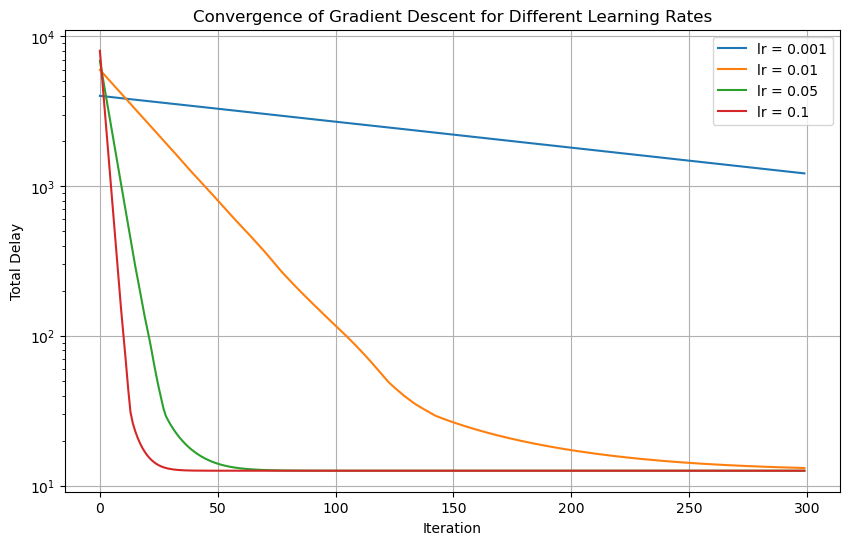

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_intersections = 5 # Number of intersections
phases_per_intersection = 3 # Number of phases per intersection
learning_rates = [0.001, 0.01, 0.05, 0.1] # Different learning rates
iterations = 300

# Total number of decision variables
n_vars = n_intersections * phases_per_intersection

def total_delay(green_times):
    optimal = 20 # Optimal green time in seconds - Some initial optimal time threshold to prevent the gradient from going to zero
    delay = np.sum((green_times - optimal)**2)  # quadratic cost
    delay += np.sum(np.abs(np.sin(green_times))) # nonlinear variation - ensure positive
    return delay

def gradient(f, x, epsilon=1e-5): 
    # Numerical gradient approximation 
    # using centered difference - second order accurate
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += epsilon
        x_minus[i] -= epsilon
        grad[i] = (f(x_plus) - f(x_minus)) / (2 * epsilon)
    return grad

convergence = {} # Store Convergence history for each learning rate

for l in learning_rates:
    green_times = np.random.uniform(10, 60, size=n_vars) # Initial green times between 10 and 60 seconds - random initialization
    delay_history = []
    
    for it in range(iterations):
        current_delay = total_delay(green_times)
        delay_history.append(current_delay)
        
        grad = gradient(total_delay, green_times)
        green_times -= l * grad
        green_times = np.maximum(green_times, 0)  # Ensure non-negative green times
    
    convergence[l] = delay_history

    print(f"Learning rate: {l}")
    print("Total delay before optimization:", delay_history[0])
    print("Total delay after optimization:", delay_history[-1])
    print("Optimized green times (seconds):")
    print(green_times.reshape(n_intersections, phases_per_intersection))
    print("-" * 50)

green_times = np.random.uniform(10, 60, size=n_vars) 
delay_history = []

# Plotting convergence
plt.figure(figsize=(10,6))
for lr, history in convergence.items():
    plt.plot(history, label=f'lr = {lr}')
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel('Total Delay')
plt.title('Convergence of Gradient Descent for Different Learning Rates')
plt.grid(True)
plt.legend()
plt.show()

### Effect of Learning Rate on Convergence and Stability

* If the learning rate is too high, the algorithm may overshoot the minimum and diverge leading to unstable behavior.
* Conversely, if the learning rate is too low, convergence will be very slow and it may not reach the minimum in a reasonable time.
* An optimal learning rate must balance convergence speed and stability.

This is evident from the above plot.